# Week5 Statistical Inference with Python

In week 5, we've covered:
* **Probability Distributions**:
    * Binomial Distribution
    * Beta Distribution
* **Inference**:
    * Estimating a batting average from data
* **Variance**:
    * measuring uncertainty
    * Emprical Bayes estimation

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

> Indented block



[Google](www.google.com) and [Python Documentation](https://docs.python.org/3/contents.html) are your good friends if you have any python questions.

Upload **Week5_Statistical_Inference_With_Python_Homework.ipynb** notebook to your Google Drive and open it with Google Colab

## Probability Distributions  

A probability distribution is a function that gives a probability to any event that might occur in an experiment. The simplest probability distribution is the binomial distribution, which can take on *n* outcomes. A 6-sided dice follows a binomial distribution with 6 possible outcomes, each side having some probability of landing up, and all the probabilities of all the sides sum to 1. An RV example of an event that follows the binomial distribution is the probability of someone converting. We can use the conversion rate, a value between 0 and 1, to describe the probability that any individual will convert. Note that the events will always be 0, didn't convert, or 1, but the conversion rate will take on a rational value between 0 and 1.

For more details of the math of the binomial distribution, watch this Khan Academy video: https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/binomial-random-variables/v/binomial-distribution  

Let's start by simulating some conversion events using python.

In [ ]:
import numpy as np

number_of_events = 1
conversion_rate = 0.3
number_of_trials = 10

Above, we have set up some parameters to simulate 10 customers, each with a probability = 3/10 of converting. Before running the below code, make a prediction for how many `1`s you expect to see. After you've written your prediction, run the cell several times and record the output in comments in the cell below.

In [ ]:
# TODO: write your prediction here: 3

sample = np.random.binomial(n = number_of_events, p = conversion_rate, size = number_of_trials)
print(sample)
print("total conversions: ", sample.sum())

[0 0 1 0 1 0 0 1 0 1]
total conversions:  4


In [ ]:
# TODO: Write down what you observed. How did your observations compare to your prediction?
# Res: is not 3 because we have only 10 observations

As the number of trials increases, we would expect the actual proportion of 1s to approach the "true" conversion rate,  which in this case is 0.3 by our design. This phenomenon is called the "Law of Large Numbers." In the code block below, create a short experiment that demonstrates this phenomenon.

Note that if you have a numpy array named `sample` you can get its proportion by using `sample.mean()`

In [ ]:
# TODO: Write a short experiment that demonstrates the Law of Large Numbers.
size=10
for i in range(10):
  sample = np.random.binomial(n = number_of_events, p = conversion_rate, size = size)
  print(f"size: {size} \t conversion rate: {sum(sample)/size}")
  size = size*2



size: 10 	 conversion rate: 0.4
size: 20 	 conversion rate: 0.1
size: 40 	 conversion rate: 0.275
size: 80 	 conversion rate: 0.3125
size: 160 	 conversion rate: 0.24375
size: 320 	 conversion rate: 0.3
size: 640 	 conversion rate: 0.29375
size: 1280 	 conversion rate: 0.3125
size: 2560 	 conversion rate: 0.298828125
size: 5120 	 conversion rate: 0.3044921875


## Inference  

In the above, we were told the true conversion rate by some all-knowing oracle, and then we explored how conversions might play out over a set of *n* trials. Typically, we are tasked with the reverse problem. That is, we are given access to some observed data, and asked to infer what the true conversion rate is. This process is called "statistical inference" and it is a core concept to all of data science and machine learning. We will spend some time over the next weeks developing your python skills to explore statistical inference.  

We will be leveraging a well known data science communicator, David Robinson, and will read the first four articles of this series: http://varianceexplained.org/r/simulation-bayes-baseball/  

The coding language of the series is R, a statistical programming language, but you will be asked to recreate and explore some of the ideas here in python. Let's start by understanding a second probability distribution, the beta distribution. This probability distribution is closely related to the binomial distribution we explored above. In short, it can be used to describe what the probability of the true conversion rate is, given some data. Read more about it in the first article of the series: http://varianceexplained.org/statistics/beta_distribution_and_baseball/

### Exercises  

1. In the code block below, write a short simulation that samples batting averages from a Beta Distribution with parameters $\alpha = 81$ and $\beta = 219$ You will likely find this numpy method to be helpful: https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html

In [2]:
# TODO
from numpy import random
a=81
b=219
samples = random.beta(a, b, size=300)


What are the lowest and highest batting averages from your experiment? What is the median batting average from your experiment? How does the median batting average from your experiment relate to the parameters alpha=81 and beta=219?

In [3]:
# TODO
import statistics
print("max",max(samples))
print("min",min(samples))
print("median",statistics.median(samples))
print("mean f(a,b) = a/(a+b)",a/(a+b))
print("mean of samles",sum(samples)/len(samples))

max 0.3672209980276959
min 0.18963966976952076
median 0.26735378026866335
mean f(a,b) = a/(a+b) 0.27
mean of samles 0.26773819144358835


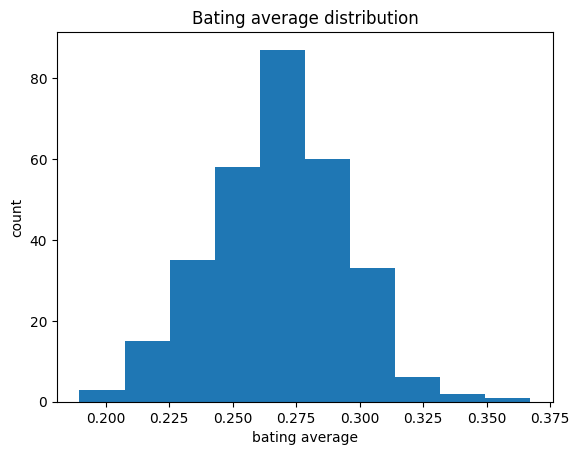

In [4]:
from matplotlib import pyplot as plt
plt.hist(samples)
plt.title('Bating average distribution')
plt.xlabel('bating average')
plt.ylabel('count')
plt.show()

3. Sample a single batting average from your experiment at random, and then use that batting average to simulate 300 at bats. Give a statistical summary of the 300 at bats.

    Hint: When you have a single probablity of success (p) and a sequence of 300 Bernoulli(p) trials, what distribution should you sample from?

    Hint: What is a statistical summary? What 2 values can I usually use to describe a probability distribution?

In [13]:
# TODO

# This is a binomial distribution
p= float(samples[0])
n=300
x = random.binomial(n=n, p=p, size=n)
print("Binomial distribution")
print("mean", n*p)
print("variance", (n*p)*(1-p))


Binomial distribution
mean 89.84770667503405
variance 62.93900535915753


4. As in the article, lets start with the $Beta(81, 219)$ distribution as the starting point of our estimate for a player's batting average at the start of a season. Then we will simulate a 300 at-bat season where a player gets 100 hits. 

    We will use the 300 new data points to *update* our initial best guess based on the prior information $Beta(81, 219)$

    Finally, we will analyze our updated estimate for the batting average of the simulated player at the end of the season. Fill in the code below to complete the above.

In [ ]:
# constants, the initial parameters of the beta distribution
ALPHA0 = 81
BETA0 = 219  
INITIAL_BETA = dict(alpha=ALPHA0, beta=BETA0)

def update_beta(alpha0, beta0, hits, at_bats):
    '''
    Parameters:
        alpha0, int: the initial number of success
        beta0, int: the initial number of failures
        hits, int: the number of hits
        at_bats, int: the number of at bats
        
    Return:
        dictionary with two members alpha and beta, each representing the updated successes and failures respectively.
    '''
    misses = at_bats - hits
    return dict(alpha=alpha0 + hits, beta= beta0 + misses)

# unit test. If you've written your function correctly, the following code should give the expected outputs
hits = 100
at_bats = 300
updated_beta = update_beta(alpha0 = ALPHA0, beta0 = BETA0, hits = hits, at_bats = at_bats)
print(updated_beta['alpha']) # should equal 181
print(updated_beta['beta']) # should equal 419

181
419


Using code and text, give a brief statistical analysis of the updated probability distribution. If the manager asked you to give an estimate for the player's batting average at the end of the season, what answer would you give?

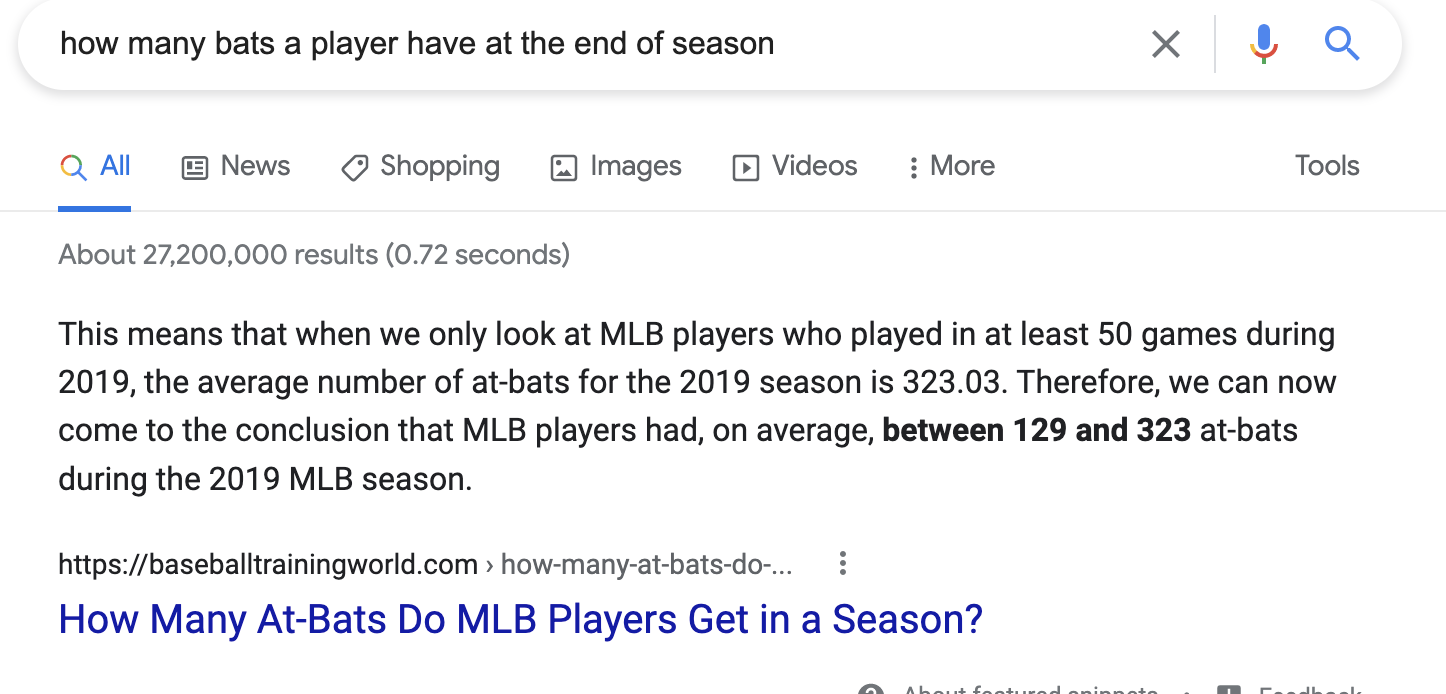

In [ ]:
# TODO: Code

ALPHA0 = 81
BETA0 = 219  
INITIAL_BETA = dict(alpha=ALPHA0, beta=BETA0)


#From google before 
min_at_bats = 129
max_at_bats = 323
avg_at_bats = (max_at_bats - min_at_bats)/2

updated_beta = update_beta(alpha0 = ALPHA0, beta0 = BETA0, hits = hits, at_bats = avg_at_bats)

print(updated_beta)

print(181/216.0)



{'alpha': 181, 'beta': 216.0}
0.8379629629629629


TODO: Text

## Variance  

So far, we've done some work to understand probability distributions, but we haven't taken advantage of the most important part - variance. Variance is a measure of uncertainty, it's a way to quantify everything you might *not* know about your estimate. Read the second article to begin to understand how variance can be used to leverage uncertainty: http://varianceexplained.org/r/empirical_bayes_baseball/

In [1]:
import pandas as pd  

# prepare the dataset  
batting_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
pitching_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Pitching.csv'
people_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv'

batting = pd.read_csv(batting_url)
pitching = pd.read_csv(pitching_url)
master = pd.read_csv(people_url)

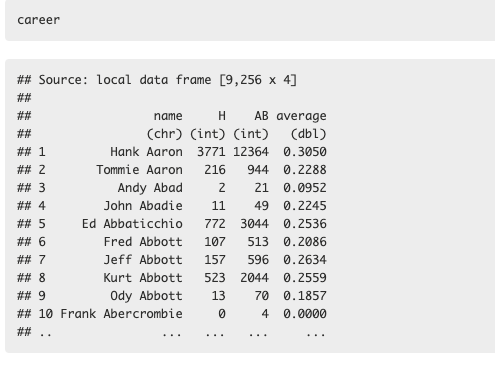

In [2]:
print("batting", batting.columns)
print("pitching", pitching.columns)
print("master", master.columns)
print(master.head())

# There are two H one in pitching and one in batting


batting Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')
pitching Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')
master Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')
    playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0    

In [6]:
# career <- Batting %>%
#   filter(AB > 0) %>%
#   anti_join(Pitching, by = "playerID") %>%
#   group_by(playerID) %>%
#   summarize(H = sum(H), AB = sum(AB)) %>%
#   mutate(average = H / AB) There are two H one in pitching and one if batting which one do we use?

# career <- Master %>%
#   tbl_df() %>%
#   select(playerID, nameFirst, nameLast) %>%
#   unite(name, nameFirst, nameLast, sep = " ") %>%
#   inner_join(career, by = "playerID") %>%
#   select(-playerID)

new_df = batting[batting.AB>0][["playerID","H", "AB"]].groupby(by="playerID").sum()
new_df['average'] = new_df["H"]/new_df["AB"]
new_master = master
new_master["name"] = master["nameFirst"].str.cat(master["nameLast"], sep = " ")
new_master = new_master.set_index('playerID')
career = pd.merge(new_df, new_master, left_index=True, right_index=True)
career = career[["name", "H", "AB", "average"]]
career

,name,H,AB,average
playerID,,,,
aaronha01,Hank Aaron,3771,12364,0.304998
aaronto01,Tommie Aaron,216,944,0.228814
abadan01,Andy Abad,2,21,0.095238
abadijo01,John Abadie,11,49,0.224490
abbated01,Ed Abbaticchio,772,3044,0.253614
...,...,...,...,...
zuninmi01,Mike Zunino,518,2559,0.202423
zupcibo01,Bob Zupcic,199,795,0.250314
zupofr01,Frank Zupo,3,18,0.166667


In [8]:
# This is the same just double checking with next weeks homework

# recreate career dataframe from next homework to check
pitchers = pitching['playerID'].tolist()
batting = batting[batting['AB'] > 0]
batting = batting[~batting['playerID'].isin(pitchers)] #filtered out pitchers
batting_sum =batting.groupby(['playerID']).agg({'H':'sum','AB':'sum'}) # get total hits and at bats for each player
batting_sum['Avg'] = batting_sum.loc[:,'H'] / batting_sum.loc[:,'AB'] #calculate the avg batting rate
career = pd.merge(batting_sum, master, how='inner', on='playerID')[["playerID","nameFirst", "nameLast", "H", "AB", "Avg"]]
career= career[career["AB"]>=500]
career.head()

,playerID,nameFirst,nameLast,H,AB,Avg
0,aaronha01,Hank,Aaron,3771,12364,0.304998
1,aaronto01,Tommie,Aaron,216,944,0.228814
4,abbated01,Ed,Abbaticchio,772,3044,0.253614
5,abbotfr01,Fred,Abbott,107,513,0.208577
6,abbotje01,Jeff,Abbott,157,596,0.263423


### Exercises  

5. Use pandas methods to recreate the `career` data set from the article. You may find the pandas docs useful: https://pandas.pydata.org/pandas-docs/version/0.25.3/#  

    Focus on the logical steps taken in the article text and R code and create the appropriate pandas syntax.

In [ ]:
# TODO: recreate career dataframe

career.head()

,name,H,AB,average
playerID,,,,
aardsda01,David Aardsma,0,4,0.000000
aaronha01,Hank Aaron,3771,12364,0.304998
aaronto01,Tommie Aaron,216,944,0.228814
aasedo01,Don Aase,0,5,0.000000
abadan01,Andy Abad,2,21,0.095238


6. display the 5 highest and 5 lowest batting averages from the career dataset.

In [ ]:
# TODO
print("max", max(career['average']))
print("min", min(career['average']))

max 1.0
min 0.0


### Note: Later in the article - he recommends filtering down to batters with >500 at bats. Do this now to roughly match the alpha and beta values in the article.

In [ ]:
# TODO
print("max", max(career[career.AB>500]['average']))
print("min", min(career[career.AB>500]['average']))

max 0.3662994053864988
min 0.06646525679758308


7. Calculate the mean and variance of the empirical batting averages in the dataset

In [ ]:
career.describe()

,H,AB,average
count,17841.000000,17841.000000,17841.000000
mean,224.099770,858.128188,0.188512
std,468.270536,1667.372335,0.120114
min,0.000000,1.000000,0.000000
25%,2.000000,13.000000,0.124740
50%,21.000000,112.000000,0.211416
75%,176.000000,761.000000,0.255208
max,4256.000000,14053.000000,1.000000


In [ ]:
# TODO  
import statistics

empirical_mean = statistics.mean(career["average"])
empirical_variance = statistics.pvariance(career["average"])

print(empirical_mean, empirical_variance)

0.18851241946174294 0.014426467074929014


8. Write functions to calculate alpha and beta using the method of moments and your estimated mean and variance above. https://stats.stackexchange.com/questions/12232/calculating-the-parameters-of-a-beta-distribution-using-the-mean-and-variance  

In [ ]:
# TODO  

#Given example on the link
# estBetaParams <- function(mu, var) {
#   alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2
#   beta <- alpha * (1 / mu - 1)
#   return(params = list(alpha = alpha, beta = beta))
# }


def estBetaParams(mean, variance):
  alpha =((1 - mean) / variance - 1 / mean) * mean ** 2.0
  return dict( alpha=alpha, beta = alpha * (1 / mean - 1))


9. Use your function to calculate an $\alpha_0$ and $\beta_0$ for the career data set, and then calculate an empirical bayes estimate of each players batting average. Display the top 5 and bottom 5 estimated batting averages.

In [ ]:
# TODO
estBetaParams(empirical_mean, empirical_variance)

{'alpha': 1.810437084602967, 'beta': 7.79337092853635}

## Submission

Download completed **Week5_Statistical_Inference_With_Python_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.